In [8]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.metrics import auc

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.53 ms


In [9]:
inpainting_results = '../INPAINTING-RESULTS/'
saliency_results = '../SALIENCY-RESULTS/'
cae_results = ''

time: 902 µs


In [62]:
def plot_roc(dataset_type, optimized, inp_index, sal_index, sal_type, top=1, verbose=False, inp_second_index=-1):
    
    if optimized:
        optimized_word = '_Optimized_'
        best_jump = 61
    else:
        optimized_word = ''
        best_jump = 32
    
    inpainting_path = inpainting_results + dataset_type + optimized_word + 'Inpainting_Accuracy_results.xlsx'
    inp_clear_path = inpainting_results + 'Clear'+ optimized_word +'Inpainting_Accuracy_results.xlsx'

    saliency_path = saliency_results + dataset_type + '_Saliency_Accuracy_results.xlsx'
    sal_clear_path = saliency_results + 'Clear_Saliency_Accuracy_results.xlsx'

    inp_df = pd.read_excel(inpainting_path, index_col=0)
    inp_clear_df = pd.read_excel(inp_clear_path, index_col=0)
    sal_df = pd.read_excel(saliency_path, index_col=0)
    sal_clear_df = pd.read_excel(sal_clear_path, index_col=0)
    
    inp_name, best_inp = inp_df.iloc[inp_index:inp_index+1].index.values[0], inp_df.iloc[inp_index:inp_index+best_jump]['Top '+str(top)].values
    inp_name = inp_name[:-7] + inp_name[-3:]
    inp_param1, inp_param2 = inp_name[-5:-3], inp_name[-2:]
    clear_inp = inp_clear_df[inp_clear_df.index.str.contains(inp_param1, na=False) & inp_clear_df.index.str.contains(inp_param2, na=False)]['False positives'].values
    
    
    sal_name, best_sal = sal_df.iloc[sal_index:sal_index+1].index.values[0], sal_df.iloc[sal_index:sal_index+32]['Top 1'].values
    sal_name = sal_name[:-4]
    sal_param1, sal_param2 = sal_name[-6:-3], sal_name[-2:]
    clear_sal = sal_clear_df[sal_clear_df.index.str.contains(sal_type, na=False) & sal_clear_df.index.str.contains(sal_param1, na=False) & sal_clear_df.index.str.contains(sal_param2, na=False)]['Top 1'].values
    

    if verbose:
        print(inp_name)
        print(best_inp)
        print(clear_inp)
        print(sal_name)
        print(best_sal)
        print(clear_sal)
    
    plt.figure(figsize=(7,7))
    lw = 2
    plt.plot(clear_inp/100, best_inp/100, color='darkorange',
             lw=lw, label=inp_name+' (area = {0:0.2f})'.format(auc(clear_inp/100, best_inp/100)))
    
    if inp_second_index >= 0:
        second_inp_name, second_best_inp = inp_df.iloc[inp_second_index:inp_second_index+1].index.values[0], inp_df.iloc[inp_second_index:inp_second_index+best_jump]['Top '+str(top)].values
        second_inp_name = second_inp_name[:-7] + second_inp_name[-3:]
        second_inp_param1, second_inp_param2 = second_inp_name[-5:-3], second_inp_name[-2:]
        second_clear_inp = inp_clear_df[inp_clear_df.index.str.contains(second_inp_param1, na=False) & inp_clear_df.index.str.contains(second_inp_param2, na=False)]['False positives'].values
        plt.plot(second_clear_inp/100, second_best_inp/100, color='darkgreen',
             lw=lw, label=second_inp_name+' (area = {0:0.2f})'.format(auc(second_clear_inp/100, second_best_inp/100)))
        if verbose:
            print(second_inp_name)
            print(second_best_inp)
            print(second_clear_inp)

    plt.plot(clear_sal/100, best_sal/100, color='darkblue',
             lw=lw, label=sal_name+' (area = {0:0.2f})'.format(auc(clear_sal/100, best_sal/100)))
    

    x_random = np.linspace(0.0, 1.0)
    y_random = math.tan(39/180*math.pi)*x_random
    plt.plot(x_random, y_random, color='darkgray', lw=lw, linestyle='--', label='Random detection')
    #plt.plot([0.0, 1.0], [0.33, 0.33], color='m', lw=lw, linestyle='--', label='CAE upper bound')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Top '+str(top)+' in '+dataset_type+' dataset')
    plt.legend(loc="lower right")
    plt.show()

time: 8.57 ms


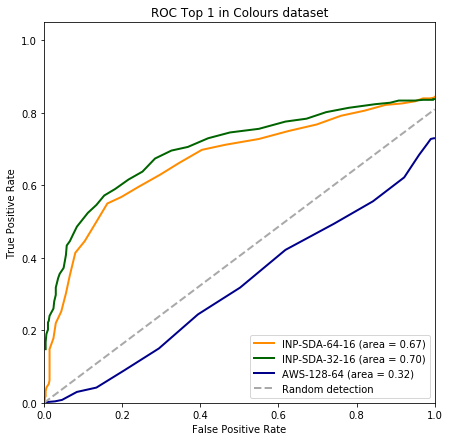

time: 500 ms


In [63]:
plot_roc(dataset_type='Colours', optimized=True, inp_index=0, sal_index=0, sal_type = 'AWS', top=1, verbose=False, inp_second_index=62)

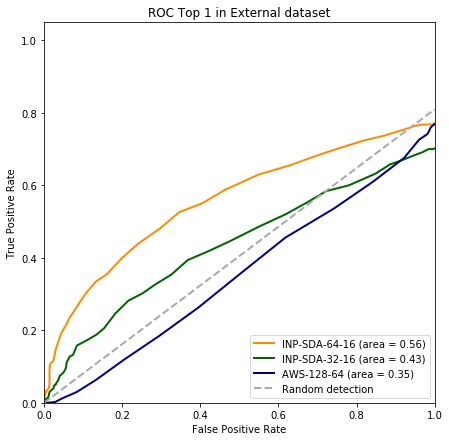

time: 491 ms


In [64]:
plot_roc(dataset_type='External', optimized=True, inp_index=62, sal_index=0, sal_type = 'AWS', top=1, verbose=False, inp_second_index=0)